In [31]:
# Actividad formativa 5
# Vicente Lavagnino

# Imports 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import preprocessing
from sklearn import mixture
from sklearn.decomposition import PCA



In [32]:
faces = datasets.fetch_olivetti_faces()
X = faces.data

# reducir dimensionalidad con pca para retener 95% varianza
pca = PCA(n_components=0.95)
X = pca.fit_transform(X)

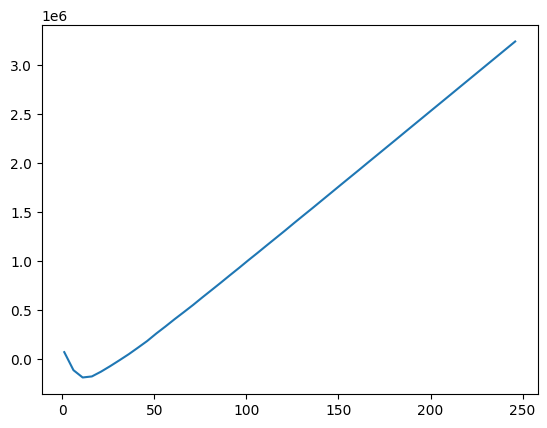

In [33]:
# Calcular AIC para n en 1250 en intervalos de 5

n_components = np.arange(1, 250, 5)
models = [mixture.GaussianMixture(n, covariance_type='full') for n in n_components]
aics = [model.fit(X).aic(X) for model in models]
plt.plot(n_components, aics);

In [42]:
gmm = mixture.GaussianMixture(17, covariance_type='full')
gmm.fit(X)
print(gmm.converged_)

True


In [39]:
data_new = gmm.sample(100)
data_new
data_new[0].shape

(100, 123)

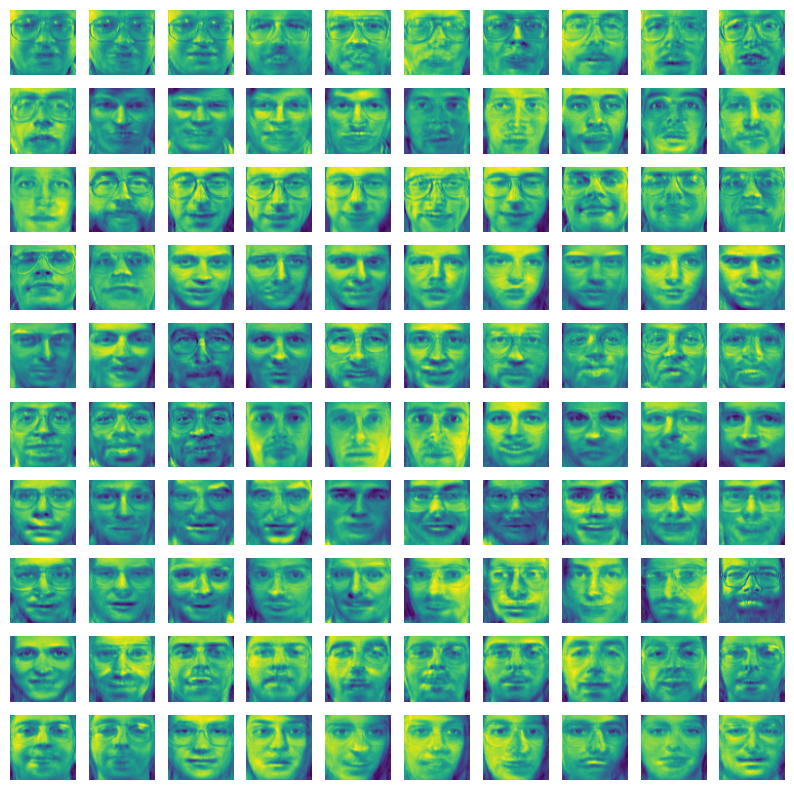

In [40]:
synthetic_data = pca.inverse_transform(data_new[0])

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(synthetic_data[idx].reshape((64, 64)))
    ax.axis("off")